In [10]:
import sys
sys.path.append('../')

In [11]:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from support_function.evaluate import *
from support_function.crossover import *


In [12]:
def normalize_theta(theta):
    return theta / np.sum(theta)

In [13]:
list_high_fitness = []
def fitness(theta):
    normalized_theta = normalize_theta(theta)
    # distance = distance_vector(normalized_theta)
    f1_score = valuate_f1_score(normalized_theta)
    # final_accuracy, confuse = accuracy_all(normalized_theta)
    return f1_score
    

In [14]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions


def mutate(child, mutation_rate):  # Ham dot bien
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [15]:
# Number of params
num_params = 16
# Number of sulutions and generations
num_solutions = 100
num_generations = 100

# Initial Solutions
solutions = generate_initial_solutions(num_solutions, num_params)

In [16]:
for generation_id in range(num_generations):
    # print(generation_id)
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)
    # theta = rankedsolutions[0][1]
    # final_accuracy, confuse = accuracy_all(theta) 
    # print(f'generation {generation_id}: accuracy: {final_accuracy.mean()}, fitness:{rankedsolutions[0][0]}, f1_score;{valuate_f1_score(theta)}')
    list_high_fitness.append(rankedsolutions[0][0])
    
    # if rankedsolutions[0][0] >=0.8:
    #     break

    bestSolutions = rankedsolutions[:20] + rankedsolutions[-5:]

    newGen = [rankedsolutions[0][1]]
    for _ in range(num_solutions-1):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child1 = crossover(parent1, parent2)

        # Mutation
        mutated_child1 = mutate(child1, mutation_rate=0.2)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child1 = normalize_theta(mutated_child1)
        newGen.append(normalized_mutated_child1)
    solutions = newGen

In [17]:
theta=np.array(solutions[0])

/home/trhoan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


+ precision = 0.455
+ recall = 0.421
+ f1_score = 0.428
+ accuracy = 0.953


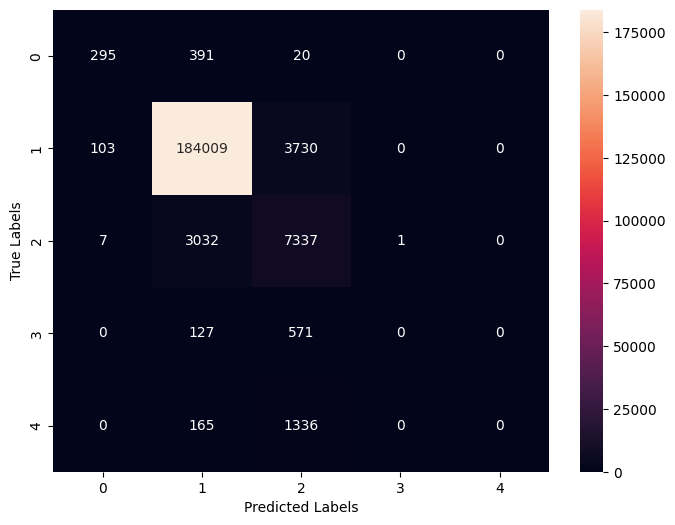

In [18]:
aaa(theta)